In [1]:
# import library yang diperlukan
import pandas as pd
import numpy as np
from datetime import *
from netCDF4 import Dataset
from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')

 File '2010.nc' berisi data rata-rata suhu di beberapa titik koordinat di Asia pada sepanjang tahun 2010.

Akan diprediksi suhu rata-rata di Jakarta pada 30 hari ke depan, setelah akhir tahun 2010 menggunakan FBProphet.
Posisi Jakarta adalah di lat: -6.125, long: 106.875

In [2]:
# membaca isi file
data = Dataset('2010.nc')

In [3]:
# menampilkan isi variabel dari dataset
data.variables.keys()

dict_keys(['lon', 'lat', 'time', 'tave', 'rstn'])

In [4]:
# ambil semua data latitude
lat = data.variables['lat'][:]
print(lat)

[-14.875 -14.625 -14.375 -14.125 -13.875 -13.625 -13.375 -13.125 -12.875
 -12.625 -12.375 -12.125 -11.875 -11.625 -11.375 -11.125 -10.875 -10.625
 -10.375 -10.125  -9.875  -9.625  -9.375  -9.125  -8.875  -8.625  -8.375
  -8.125  -7.875  -7.625  -7.375  -7.125  -6.875  -6.625  -6.375  -6.125
  -5.875  -5.625  -5.375  -5.125  -4.875  -4.625  -4.375  -4.125  -3.875
  -3.625  -3.375  -3.125  -2.875  -2.625  -2.375  -2.125  -1.875  -1.625
  -1.375  -1.125  -0.875  -0.625  -0.375  -0.125   0.125   0.375   0.625
   0.875   1.125   1.375   1.625   1.875   2.125   2.375   2.625   2.875
   3.125   3.375   3.625   3.875   4.125   4.375   4.625   4.875   5.125
   5.375   5.625   5.875   6.125   6.375   6.625   6.875   7.125   7.375
   7.625   7.875   8.125   8.375   8.625   8.875   9.125   9.375   9.625
   9.875  10.125  10.375  10.625  10.875  11.125  11.375  11.625  11.875
  12.125  12.375  12.625  12.875  13.125  13.375  13.625  13.875  14.125
  14.375  14.625  14.875  15.125  15.375  15.625  1

In [5]:
# mengetahui index posisi latitude=-6.125 (Jakarta) di data latitude
np.where(lat == -6.125)

# index posisi lat ini nanti akan digunakan untuk mendapatkan data suhu di Jakarta

(array([35], dtype=int64),)

ditemukan index posisi latitude Jakarta ada di index ke-35

In [6]:
# ambil semua data longitude
long = data.variables['lon'][:]
print(long)

[ 60.125  60.375  60.625  60.875  61.125  61.375  61.625  61.875  62.125
  62.375  62.625  62.875  63.125  63.375  63.625  63.875  64.125  64.375
  64.625  64.875  65.125  65.375  65.625  65.875  66.125  66.375  66.625
  66.875  67.125  67.375  67.625  67.875  68.125  68.375  68.625  68.875
  69.125  69.375  69.625  69.875  70.125  70.375  70.625  70.875  71.125
  71.375  71.625  71.875  72.125  72.375  72.625  72.875  73.125  73.375
  73.625  73.875  74.125  74.375  74.625  74.875  75.125  75.375  75.625
  75.875  76.125  76.375  76.625  76.875  77.125  77.375  77.625  77.875
  78.125  78.375  78.625  78.875  79.125  79.375  79.625  79.875  80.125
  80.375  80.625  80.875  81.125  81.375  81.625  81.875  82.125  82.375
  82.625  82.875  83.125  83.375  83.625  83.875  84.125  84.375  84.625
  84.875  85.125  85.375  85.625  85.875  86.125  86.375  86.625  86.875
  87.125  87.375  87.625  87.875  88.125  88.375  88.625  88.875  89.125
  89.375  89.625  89.875  90.125  90.375  90.625  9

In [7]:
# mengetahui index posisi longitude 106.875 (Jakarta) di dalam data longitude
np.where(long == 106.875)

(array([187], dtype=int64),)

diperoleh index posisi longitude Jakarta ada di index ke-187

In [8]:
# ambil semua data time
time = data.variables['time'][:]
print(time)

[     0.   1440.   2880.   4320.   5760.   7200.   8640.  10080.  11520.
  12960.  14400.  15840.  17280.  18720.  20160.  21600.  23040.  24480.
  25920.  27360.  28800.  30240.  31680.  33120.  34560.  36000.  37440.
  38880.  40320.  41760.  43200.  44640.  46080.  47520.  48960.  50400.
  51840.  53280.  54720.  56160.  57600.  59040.  60480.  61920.  63360.
  64800.  66240.  67680.  69120.  70560.  72000.  73440.  74880.  76320.
  77760.  79200.  80640.  82080.  83520.  84960.  86400.  87840.  89280.
  90720.  92160.  93600.  95040.  96480.  97920.  99360. 100800. 102240.
 103680. 105120. 106560. 108000. 109440. 110880. 112320. 113760. 115200.
 116640. 118080. 119520. 120960. 122400. 123840. 125280. 126720. 128160.
 129600. 131040. 132480. 133920. 135360. 136800. 138240. 139680. 141120.
 142560. 144000. 145440. 146880. 148320. 149760. 151200. 152640. 154080.
 155520. 156960. 158400. 159840. 161280. 162720. 164160. 165600. 167040.
 168480. 169920. 171360. 172800. 174240. 175680. 17

data time di atas dalam satuan menit, dihitung mulai dari tanggal 1/1/2010. Sehingga untuk memudahkan analisis perlu dikonversi ke format date terlebih dahulu.<br><br>
Misal:<br>
0 menit -> tanggal 1/1/2010<br>
1440 menit -> tanggal 2/1/2010 (1440 menit atau 24 jam atau 1 hari setelah tanggal 1/1/2010)<br>
2880 menit -> tanggal 3/1/2010 (2880 menit atau 48 jam atau 2 hari setelah tanggal 1/1/2010)<br>
dan seterusnya..

In [9]:
# membuat list tanggal dari data time, terhitung mulai tanggal 1/1/2010
dataTime = list(map(lambda x: str(date(2010,1,1) + timedelta(hours=x/60)), time))

In [10]:
# tampilan list tanggal (hanya 5 yang pertama sj yang ditampilkan)
dataTime[:5]

['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04', '2010-01-05']

In [11]:
# ambil semua data rata-rata suhu
tave = data.variables['tave'][:]

In [12]:
# ambil data rata-rata suhu di Jakarta berdasarkan index posisi latitude dan longitude
temp = tave[:, 35, 187]

In [13]:
# membuat dictionary berisi data time dan data rata-rata suhu di Jakarta
myData = {'time': dataTime, 'temp': temp}

In [14]:
# mengkonversi dictionary ke dataframe
data = pd.DataFrame(myData, columns = ['time','temp'])

In [15]:
# FBProphet mewajibkan penamaan kolom waktunya dengan 'ds', dan kolom nilainya dengan 'y'
# mengubah nama kolom 'time' ke 'ds' dan 'temp' ke 'y'
data = data.rename(columns={'time': 'ds', 'temp': 'y'})

In [16]:
data.head()

,ds,y
0,2010-01-01,28.567158
1,2010-01-02,28.054541
2,2010-01-03,28.693995
3,2010-01-04,29.311541
4,2010-01-05,28.096054


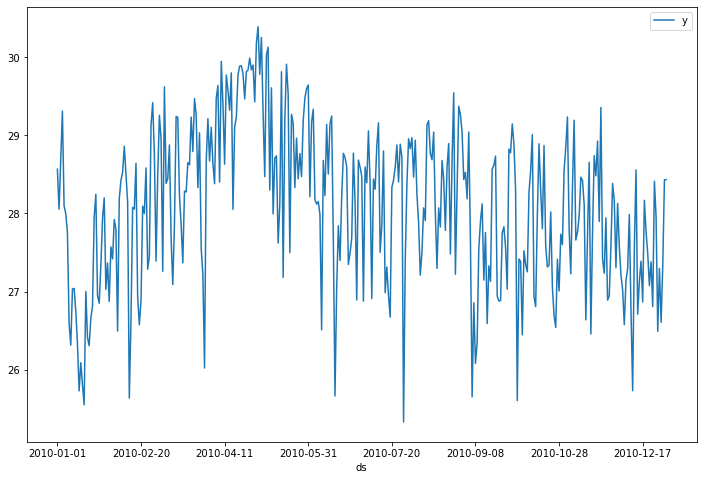

In [17]:
# mengeset kolom 'ds' dari dataset sebagai index lalu memplotnya
ax = data.set_index('ds').plot(figsize=(12, 8))

In [18]:
# setting konfigurasi fbprophet pada level konfidensi 95%
# menggunakan analisis seasonality harian, mingguan, bulanan, tahunan
my_model = Prophet(interval_width=0.95, daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
my_model.add_seasonality(name='monthly', period=30.5, fourier_order=3)

In [19]:
# membuat model
my_model.fit(data)

In [20]:
# membuat deret tanggal untuk 30 hari ke depan (setelah tanggal terakhir di dataset)
future_dates = my_model.make_future_dataframe(periods=30)
future_dates.head()

,ds
0,2010-01-01
1,2010-01-02
2,2010-01-03
3,2010-01-04
4,2010-01-05


In [21]:
# memprediksi suhu rata-rata Jakarta 30 hari ke depan
# yhat_lower dan yhat_upper adalah batas bawah dan atas nilai prediksi
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2010-01-01,28.884613,27.425247,30.312755
1,2010-01-02,28.571067,27.222018,30.087503
2,2010-01-03,28.196790,26.761437,29.618484
3,2010-01-04,27.937382,26.340604,29.390063
4,2010-01-05,27.481465,26.131243,28.851018
...,...,...,...,...
390,2011-01-26,25.107054,23.674872,26.590458
391,2011-01-27,25.344057,23.955025,26.810791
392,2011-01-28,25.629057,24.132229,27.096791
393,2011-01-29,25.966531,24.561132,27.420963


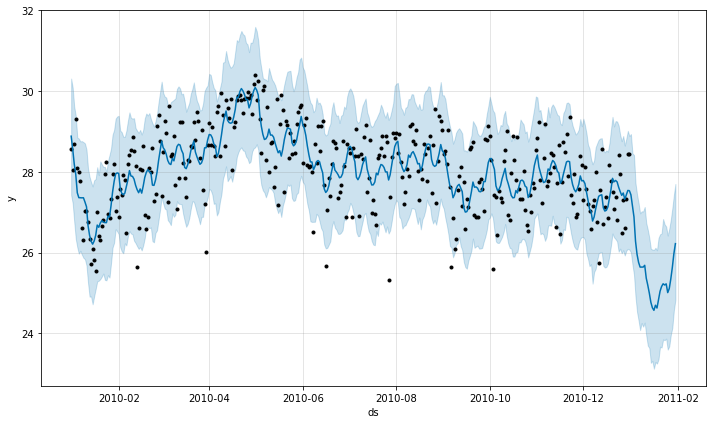

In [22]:
# memplot titik data asli, dan hasil prediksi
my_model.plot(forecast, uncertainty=True);

Keterangan:<br>
* Titik-titik hitam menunjukkan data real dari dataset
* Garis biru tua menunjukkan nilai prediksi
* Shade warna biru muda menunjukkan range toleransi prediksi (batas bawah, batas atas)

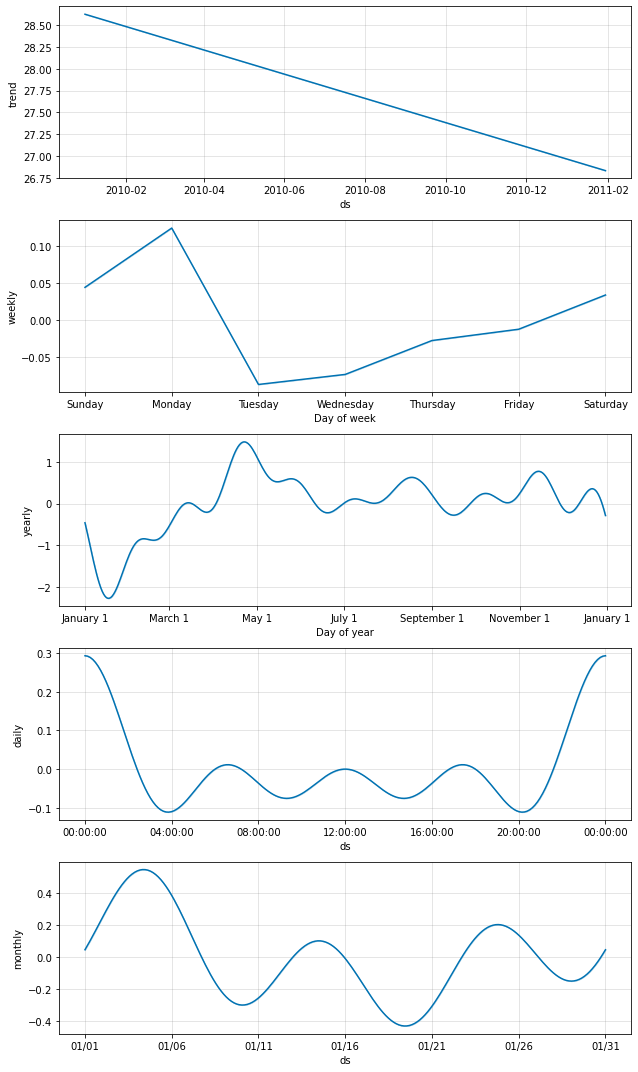

In [23]:
# memplot trend data dari keseluruhan data, serta seasonality: harian, mingguan, bulanan, dan tahunan
my_model.plot_components(forecast);